The purpose of this notebook is to predict the similarity of GitHub Issue labels to the labels "security" and "vulnerability". The use of spaCy and GloVe will be evaluated by their utility in this task.

# SpaCy

In [ ]:
import spacy

nlp_sm = spacy.load("en_core_web_sm")

## Experiments

In [ ]:
sm_label = nlp_sm("security")

In [ ]:
sm_label2 = nlp_sm("vulnerability")

In [ ]:
print(sm_label, "<->", sm_label2, sm_label.similarity(sm_label2))

security <-> vulnerability 0.7965347826534772


Test out simple labels which we might expect would be similar:

In [ ]:
sm_test1 = nlp_sm("bug")
print(sm_test1, "<->", sm_label, sm_test1.similarity(sm_label))
print(sm_test1, "<->", sm_label2, sm_test1.similarity(sm_label2))

bug <-> security 0.6740645666130319
bug <-> vulnerability 0.5688523061642695


In [ ]:
sm_test2 = nlp_sm("insecure")
print(sm_test2, "<->", sm_label, sm_test2.similarity(sm_label))
print(sm_test2, "<->", sm_label2, sm_test2.similarity(sm_label2))

insecure <-> security 0.6533364319319176
insecure <-> vulnerability 0.705820830598976


In [ ]:
sm_test3 = nlp_sm("unsafe")
print(sm_test3, "<->", sm_label, sm_test3.similarity(sm_label))
print(sm_test3, "<->", sm_label2, sm_test3.similarity(sm_label2))

unsafe <-> security 0.47697006003469256
unsafe <-> vulnerability 0.5230829815579838


In [ ]:
sm_test4 = nlp_sm("vulnerable")
print(sm_test4, "<->", sm_label, sm_test4.similarity(sm_label))
print(sm_test4, "<->", sm_label2, sm_test4.similarity(sm_label2))

vulnerable <-> security 0.5249633367952065
vulnerable <-> vulnerability 0.506240344325377


In [ ]:
sm_test5 = nlp_sm("dog")
print(sm_test5, "<->", sm_label, sm_test5.similarity(sm_label))
print(sm_test5, "<->", sm_label2, sm_test5.similarity(sm_label2))

dog <-> security 0.6259899698075035
dog <-> vulnerability 0.5904966117464396


Use the large package with MANY word vectors included for more accurate results.

In [ ]:
!python -m spacy download en_core_web_lg
import en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.2 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=a74a9ce03a77bb67f35634dd8b23d53008a9086f2a4da5b1cadd1c7ee5a84aa3
  Stored in directory: /tmp/pip-ephem-wheel-cache-6ji5v3di/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
nlp_lg = en_core_web_lg.load()

lg_label = nlp_lg("security")
lg_label2 = nlp_lg("vulnerability")

lg_test1 = nlp_lg("bug")
lg_test2 = nlp_lg("insecure")
lg_test3 = nlp_lg("unsafe")
lg_test4 = nlp_lg("vulnerable")

In [ ]:
print(lg_label, "<->", lg_label2, lg_label.similarity(lg_label2))

security <-> vulnerability 0.5095413966051392


In [ ]:
print(test1, "<->", lg_label, test1.similarity(lg_label))
print(test1, "<->", lg_label2, test1.similarity(lg_label2))

bug <-> security 0.29468643661551325
bug <-> vulnerability 0.3992475894969541


In [ ]:
print(test2, "<->", lg_label, test2.similarity(lg_label))
print(test2, "<->", lg_label2, test2.similarity(lg_label2))

insecure <-> security 0.366487105387259
insecure <-> vulnerability 0.4748353033691004


In [ ]:
print(test3, "<->", lg_label, test3.similarity(lg_label))
print(test3, "<->", lg_label2, test3.similarity(lg_label2))

unsafe <-> security 0.2584225218602517
unsafe <-> vulnerability 0.27426078407910415


In [ ]:
print(test4, "<->", lg_label, test4.similarity(lg_label))
print(test4, "<->", lg_label2, test4.similarity(lg_label2))

vulnerable <-> security 0.44470424491192456
vulnerable <-> vulnerability 0.6644242300419219


In [ ]:
lg_test5 = nlp_lg("dog")
print(test5, "<->", lg_label, test5.similarity(lg_label))
print(test5, "<->", lg_label2, test5.similarity(lg_label2))

dog <-> security 0.22207311333141674
dog <-> vulnerability 0.05948544424415952


The large model appears to perform even worse than we would expect for words that we consider semantically similar! However, it is better and distinguising the very dissimilar words "dog" and "vulnerability". Try the medium pre-trained model.

In [ ]:
!python -m spacy download en_core_web_md
import en_core_web_md
nlp_md = en_core_web_md.load()

     |████████████████████████████████| 96.4 MB 1.2 MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-py3-none-any.whl size=98051302 sha256=ebf196cb59bd72bd636d61ef6107205e1627e9e08a38edc27a6c046bdae545fc
  Stored in directory: /tmp/pip-ephem-wheel-cache-jnviqfvf/wheels/69/c5/b8/4f1c029d89238734311b3269762ab2ee325a42da2ce8edb997
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
md_label = nlp_md("security")
md_label2 = nlp_md("vulnerability")

md_test1 = nlp_md("bug")
md_test2 = nlp_md("insecure")
md_test3 = nlp_md("unsafe")
md_test4 = nlp_md("vulnerable")
md_test5 = nlp_md("dog")  # Not semantically similar

In [ ]:
print(md_label, "<->", md_label2, md_label.similarity(md_label2))

security <-> vulnerability 0.5095413966051392


In [ ]:
print(md_test1, "<->", md_label, md_test1.similarity(md_label))
print(md_test1, "<->", md_label2, md_test1.similarity(md_label2))

bug <-> security 0.29468643661551325
bug <-> vulnerability 0.3992475894969541


In [ ]:
print(md_test2, "<->", md_label, md_test2.similarity(md_label))
print(md_test2, "<->", md_label2, md_test2.similarity(md_label2))

insecure <-> security 0.366487105387259
insecure <-> vulnerability 0.4748353033691004


In [ ]:
print(md_test3, "<->", md_label, md_test3.similarity(md_label))
print(md_test3, "<->", md_label2, md_test3.similarity(md_label2))

unsafe <-> security 0.2584225218602517
unsafe <-> vulnerability 0.27426078407910415


In [ ]:
print(md_test4, "<->", md_label, md_test4.similarity(md_label))
print(md_test4, "<->", md_label2, md_test4.similarity(md_label2))

vulnerable <-> security 0.44470424491192456
vulnerable <-> vulnerability 0.6644242300419219


In [ ]:
print(md_test5, "<->", md_label, md_test5.similarity(md_label))
print(md_test5, "<->", md_label2, md_test5.similarity(md_label2))

dog <-> security 0.22207311333141674
dog <-> vulnerability 0.05948544424415952


## Results

Tabular summary of results for small, medium, and large models:

In [ ]:
# Suppress warnings from computing similarity using the small model
import warnings
warnings.filterwarnings('ignore')

## Python program to understand the usage of tabulate function for printing tables in a tabular format
from tabulate import tabulate
sm = [['security', sm_label.similarity(sm_label), sm_label.similarity(sm_label2)],
['vulnerbility', sm_label2.similarity(sm_label), sm_label2.similarity(sm_label2)],
['bug', sm_test1.similarity(sm_label), sm_test1.similarity(sm_label2)],
['insecure', sm_test2.similarity(sm_label), sm_test2.similarity(sm_label2)],
['unsafe', sm_test3.similarity(sm_label), sm_test3.similarity(sm_label2)],
['vulnerable', sm_test4.similarity(sm_label), sm_test4.similarity(sm_label2)],
['dog', sm_test5.similarity(sm_label), sm_test5.similarity(sm_label2)]] 

In [ ]:
## Python program to understand the usage of tabulate function for printing tables in a tabular format
from tabulate import tabulate
md = [['security', md_label.similarity(md_label), md_label.similarity(md_label2)],
['vulnerbility', md_label2.similarity(md_label), md_label2.similarity(md_label2)],
['bug', md_test1.similarity(md_label), md_test1.similarity(md_label2)],
['insecure', md_test2.similarity(md_label), md_test2.similarity(md_label2)],
['unsafe', md_test3.similarity(md_label), md_test3.similarity(md_label2)],
['vulnerable', md_test4.similarity(md_label), md_test4.similarity(md_label2)],
['dog', md_test5.similarity(md_label), md_test5.similarity(md_label2)]] 

In [ ]:
lg = [['security', lg_label.similarity(lg_label), lg_label.similarity(lg_label2)],
['vulnerbility', lg_label2.similarity(lg_label), lg_label2.similarity(lg_label2)],
['bug', lg_test1.similarity(lg_label), lg_test1.similarity(lg_label2)],
['insecure', lg_test2.similarity(lg_label), lg_test2.similarity(lg_label2)],
['unsafe', lg_test3.similarity(lg_label), lg_test3.similarity(lg_label2)],
['vulnerable', lg_test4.similarity(lg_label), lg_test4.similarity(lg_label2)],
['dog', lg_test5.similarity(lg_label), lg_test5.similarity(lg_label2)]] 

In [ ]:
print ('------------------- Similarity Table for Small Model -------------------')
print (tabulate(sm, headers=["Word", "Similarity to 'security'", "Similarity to 'vulnerability'"]))
print ()
print ('------------------- Similarity Table for Medium Model -------------------')
print (tabulate(md, headers=["Word", "Similarity to 'security'", "Similarity to 'vulnerability'"]))
print ()
print ("------------------- Similarity Table for Large Model -------------------")
print (tabulate(lg, headers=["Word", "Similarity to 'security'", "Similarity to 'vulnerability'"]))

------------------- Similarity Table for Small Model -------------------
Word            Similarity to 'security'    Similarity to 'vulnerability'
------------  --------------------------  -------------------------------
security                        1                                0.796535
vulnerbility                    0.796535                         1
bug                             0.674065                         0.568852
insecure                        0.653336                         0.705821
unsafe                          0.47697                          0.523083
vulnerable                      0.524963                         0.50624
dog                             0.62599                          0.590497

------------------- Similarity Table for Medium Model -------------------
Word            Similarity to 'security'    Similarity to 'vulnerability'
------------  --------------------------  -------------------------------
security                        1             

The medium and large models perform exactly the same for these basic test cases, indicating that the semantics captured by spaCy can be represented with the fewer parameters included in the medium model. While at first glance the small model appears to perform better for identifying similar words, it also falsely classifies a dissimilar word as very similar to the target words, so the lack of word vectors within the small model make it unsuitable for our purposes.

# GloVe

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-10-17 14:11:43--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-10-17 14:11:43--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-10-17 14:11:44--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


## Experiments

## Results

# SpaCy on Real Data

## Load issue label data

In [1]:
import os

INPUT_PATH = "input"

os.mkdir(INPUT_PATH)

print("Please place data file with issue labels into the", INPUT_PATH, "directory.")

Please place data file with issue labels into the input directory.


In [2]:
import regex as re

def read_file(filename, input_path=INPUT_PATH):
  '''
  Returns a list of all the labels in the input file
  Assumes each line is formatted "/author/repo\tlabel1,label2,label3,..."
  '''
  p = re.compile("/.*/.*\t((.+,+)*.+)") # Pattern of each line
  labels = set() # The set of issue labels that will be returned

  file = open(os.path.join(input_path, filename), 'r')
  lines = file.readlines()
  for line in lines:
    m = p.match(line.strip())
    if m is None:
      continue
    labels_string = m.group(1)
    issue_labels = labels_string.split(",")
    labels.update(issue_labels) # Add this line's labels to set
  file.close()
  return labels

In [3]:
labels = read_file("demofile3.txt")

In [ ]:
count = 0
for label in labels:
  if count == 10:
    break
  print(label)
  count += 1

updated
In development
FW 3.3.0
language design :rage4:
module: apps
A-orchard
hotfix
Waiting for user
cla: no
undo-redo


## Run SpaCy on the Labels

In [4]:
import spacy
!python -m spacy download en_core_web_md
import en_core_web_md

     |████████████████████████████████| 96.4 MB 2.0 MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-py3-none-any.whl size=98051302 sha256=b1a8fded1f15bbbaeddb417f852b3609c8c1cde1940b1381862437d2f932f5cf
  Stored in directory: /tmp/pip-ephem-wheel-cache-oqv8uc87/wheels/69/c5/b8/4f1c029d89238734311b3269762ab2ee325a42da2ce8edb997
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [5]:
nlp_md = en_core_web_md.load()

In [6]:
security = nlp_md("security")
vulnerability = nlp_md("vulnerability")

In [7]:
similarities = [] # List of tuples: (label, security_similarity, vulnerability_similarity)
for label in labels:
  enc_label = nlp_md(label)
  similarities.append((label, enc_label.similarity(security), enc_label.similarity(vulnerability)))

/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__mai

The above code triggers the warning `/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.` because many of the words are unknown to SpaCy, so they will be valid SpaCy objects but will have no word vector, which makes them unhelpful from a similarity standpoint.


In [ ]:
threshold = 0.5
above_thresh_labels = [label for label, sec_sim, vul_sim in similarities if sec_sim > threshold or vul_sim > threshold]
print("There are", len(above_thresh_labels), "labels above the threshold")
if (len(above_thresh_labels) > 0):
  print("Here's a sample of the labels above the threshold:")
  for i in range(5):
    if i >= len(above_thresh_labels):
      break
    print(above_thresh_labels[i])

There are 16 labels above the threshold
Here's a sample of the labels above the threshold:
Needs Hardware
security v3
Area: Debug Infrastructure
security vulnerability
triage: user protections


In [ ]:
above_thresh_sec = [(label, sec_sim) for label, sec_sim, _ in similarities if sec_sim > threshold]
above_thresh_vul = [(label, vul_sim) for label, _, vul_sim in similarities if vul_sim > threshold]

print("There are", len(above_thresh_sec), "labels above the threshold for 'security'")
if (len(above_thresh_sec) > 0):
  print("Here's a sample of the labels above the threshold and their similarity measure:")
  for i in range(5):
    if i >= len(above_thresh_sec):
      break
    print(above_thresh_sec[i][0], "=>", above_thresh_sec[i][1])
print()
print("There are", len(above_thresh_vul), "labels above the threshold for 'vulnerability'")
if (len(above_thresh_vul) > 0):
  print("Here's a sample of the labels above the threshold and their similarity measure:")
  for i in range(5):
    if i >= len(above_thresh_vul):
      break
    print(above_thresh_vul[i][0], "=>", above_thresh_vul[i][1])

There are 15 labels above the threshold for 'security'
Here's a sample of the labels above the threshold and their similarity measure:
Needs Hardware => 0.5326270610964011
security v3 => 0.7223536702053809
Area: Debug Infrastructure => 0.5119029120838114
security vulnerability => 0.8686049977589914
triage: user protections => 0.5802197760313744

There are 6 labels above the threshold for 'vulnerability'
Here's a sample of the labels above the threshold and their similarity measure:
security vulnerability => 0.8689457870764925
security => 0.5095413966051392
critical bug => 0.5330330323968283
security fix => 0.5079090878162593
security findings => 0.5051075715488159


Let's save these labels with their similarity measures to a file!

In [8]:
import os

OUTPUT_PATH = "output"
output_filename = "relevant_labels.txt"
os.mkdir(OUTPUT_PATH)

In [ ]:
labels_and_similarities = [(label, sec_sim, vul_sim) for label, sec_sim, vul_sim in similarities if sec_sim > threshold or vul_sim > threshold]

file = open(os.path.join(OUTPUT_PATH, output_filename), 'w')
for label, sec_sim, vul_sim in labels_and_similarities:
  file.write(label + "\t" + str(sec_sim) + "\t" + str(vul_sim) + "\n")
file.close()

### Create a function to help determine threshold

In [9]:
def section_labels(similarities, threshold, save=False, filename=None, labels_only=False):
  if save and (filename is None):
    print("Please specify a filename to save to.")
    return
  
  OUTPUT_PATH = "output"
  values = [(label, sec_sim, vul_sim) for label, sec_sim, vul_sim in similarities if sec_sim > threshold or vul_sim > threshold]

  if save:
    file = open(os.path.join(OUTPUT_PATH, filename), 'w')
    if labels_only:
      for label, _, _ in values:
        file.write(label + "\n")
    else:
      for label, sec_sim, vul_sim in values:
        file.write(label + "\t" + str(sec_sim) + "\t" + str(vul_sim) + "\n")
    file.close()
  else:
    print("There are", len(values), "labels above the threshold", threshold)
    for label, sec_sim, vul_sim in values:
      print(label + "\t" + str(sec_sim) + "\t" + str(vul_sim))

Start with threshold 0.5, then continue to become more lenient

In [ ]:
section_labels(similarities, security.similarity(vulnerability))

There are 15 labels above the threshold 0.5095413966051392
Needs Hardware	0.5326270610964011	0.2965716941465733
security v3	0.7223536702053809	0.3591809270065743
Area: Debug Infrastructure	0.5119029120838114	0.36849826636494115
security vulnerability	0.8686049977589914	0.8689457870764925
triage: user protections	0.5802197760313744	0.39032634070640754
security	1.0	0.5095413966051392
area/security	0.7575661108122438	0.37215394725602124
critical bug	0.48687897058834767	0.5330330323968283
Infrastructure	0.5511181768861314	0.3824606316944508
infrastructure	0.5511181768861314	0.3824606316944508
security fix	0.8538809322947807	0.5079090878162593
Authentication	0.5101948375632891	0.41957116716626003
embedded systems	0.528331662618643	0.3547530530252997
security findings	0.7862595524456654	0.5051075715488159
critical security issue	0.8176221819256407	0.549812373051681


In [ ]:
section_labels(similarities, 0.5)

There are 16 labels above the threshold 0.5
Needs Hardware	0.5326270610964011	0.2965716941465733
security v3	0.7223536702053809	0.3591809270065743
Area: Debug Infrastructure	0.5119029120838114	0.36849826636494115
security vulnerability	0.8686049977589914	0.8689457870764925
triage: user protections	0.5802197760313744	0.39032634070640754
security	1.0	0.5095413966051392
area/security	0.7575661108122438	0.37215394725602124
critical bug	0.48687897058834767	0.5330330323968283
Infrastructure	0.5511181768861314	0.3824606316944508
infrastructure	0.5511181768861314	0.3824606316944508
Area: Build Infrastructure	0.5075821206644304	0.31568467457099303
security fix	0.8538809322947807	0.5079090878162593
Authentication	0.5101948375632891	0.41957116716626003
embedded systems	0.528331662618643	0.3547530530252997
security findings	0.7862595524456654	0.5051075715488159
critical security issue	0.8176221819256407	0.549812373051681


In [ ]:
section_labels(similarities, 0.45)

There are 91 labels above the threshold 0.45
Needs Hardware	0.5326270610964011	0.2965716941465733
Ready to deploy	0.4576434724122817	0.27194845266832457
Data Provider	0.46233653862605245	0.31242138269105857
security v3	0.7223536702053809	0.3591809270065743
Area: Debug Infrastructure	0.5119029120838114	0.36849826636494115
High Priority	0.46734603228579297	0.27798844256365024
component: TLS	0.45418671840998975	0.3600769929689655
Need testing	0.46029046548834296	0.3379402686926806
security vulnerability	0.8686049977589914	0.8689457870764925
triage: user protections	0.5802197760313744	0.39032634070640754
Crash/Data Corruption	0.47049345931224607	0.41565721328634947
priority: critical	0.4795210738892632	0.37995459581330043
Priority-Critical	0.4996049740956253	0.3636361020542121
component:build system	0.46243676649099186	0.31115527660390174
Needs more data	0.4756558981980542	0.3330487499932636
component:general-utility	0.4574996641567013	0.33078429116541647
Tag: Infrastructure	0.487260947992

In [10]:
section_labels(similarities, 0.46)

There are 68 labels above the threshold 0.46
Target: Authentication	0.49308366509187435	0.4119295738869893
Area-Server	0.47271411061975055	0.2965620944156382
area/security	0.7575661108122438	0.37215394725602124
Build system	0.4799242133771269	0.26812466376922417
feature: :lock: end to end encryption	0.4722420987184661	0.26099261434681903
code maintenance	0.4923626748864204	0.27641969336498645
Crash/Data Corruption	0.47049345931224607	0.41565721328634947
comp: border router	0.46378097113294037	0.22186609398167526
Bug? False Alarm	0.49383667514872476	0.3483412425043773
Priority-Critical	0.4996049740956253	0.3636361020542121
Area: Build Infrastructure	0.5075821206644304	0.31568467457099303
External tools	0.49157149927431304	0.35093559411658287
Needs Hardware	0.5326270610964011	0.2965716941465733
Hardware Feature	0.46345318239502764	0.28455750174284405
critical	0.47344436098737597	0.430581792347808
security	1.0	0.5095413966051392
Build System	0.4799242133771269	0.26812466376922417
has solu

Save the labels with the following threshold to a file because they seem promising

In [45]:
section_labels(similarities, security.similarity(vulnerability), save=True, filename="relevant_labels.txt", labels_only=True)

In [11]:
section_labels(similarities, 0.46, save=True, filename="relevant_labels_extended.txt", labels_only=True)

## How many of these issue labels are actually common across GitHub projects though?

In [29]:
def read_lines(filename, input_path=INPUT_PATH):
  '''
  Returns a list of all the lines in the input file
  '''
  labels = set() # The set of issue labels that will be returned

  file = open(os.path.join(input_path, filename), 'r')
  lines = file.readlines()
  for line in lines:
    labels.add(line.strip())
  file.close()
  return labels

In [30]:
relevant_labels = read_lines("relevant_labels_extended.txt", input_path="output")

In [31]:
print(relevant_labels)

{'attestation', 'has solution', 'Workaround exists', 'area/security', 'security v3', 'Need testing', 'component:deployment', 'needs-triage', 'Target: Authentication', 'Triage', 'External tools', 'Tag: Infrastructure', 'technical debt', 'Build system', 'Data Source Manager', 'update dependencies', 'Critical feature', '? - Needs Triage', 'Needs testing', 'Data corruption', 'ArcGIS feature server data provider', '0. Needs triage', 'embedded systems', 'high priority', 'Needs Hardware', 'comp: border router', 'critical bug', 'Infrastructure', 'status:unsupported client', 'in triage', 'Bug? False Alarm', 'Area: Debug Infrastructure', 'triage', 'Network', 'Priority-Critical', 'Data Provider', 'feature: :lock: end to end encryption', 'security vulnerability', 'Hardware Feature', 'Area: Build Infrastructure', 'component:build system', 'Authentication', 'High Priority', 'infrastructure', 'needs testing', 'critical security issue', 'critical', 'building-system', 'triage: feature', 'Needs more dat

In [44]:
print(len(relevant_labels))

68


In [52]:
import regex as re

def determine_frequency(relevant_labels, full_file, input_path="input"):
  '''
  Returns a dict with the frequency of each label in relevant_labels
  Assumes each line of full file is formatted "/author/repo\tlabel1,label2,label3,..."
  '''
  frequency = {} # The dict of relevant label frequencies to return
  # Populate frequency where each label starts with 0 frequency
  for label in relevant_labels:
    frequency[label] = 0

  p = re.compile("/.*/.*\t((.+,+)*.+)") # Pattern of each line
  file = open(os.path.join(input_path, full_file), 'r')
  lines = file.readlines()
  for line in lines:
    m = p.match(line.strip())
    if m is None:
      continue
    labels_string = m.group(1)
    issue_labels = labels_string.split(",")
    
    for label in relevant_labels:
      if label in issue_labels:
        frequency[label] += 1
  file.close()
  return frequency

In [35]:
frequency = determine_frequency(relevant_labels=relevant_labels, full"demofile3.txt", input_path="input")

In [36]:
for label, freq in frequency.items():
  print(label + "\t" + str(freq))

attestation	1
has solution	1
Workaround exists	1
area/security	1
security v3	1
Need testing	1
component:deployment	1
needs-triage	1
Target: Authentication	1
Triage	1
External tools	1
Tag: Infrastructure	1
technical debt	1
Build system	3
Data Source Manager	1
update dependencies	1
Critical feature	1
? - Needs Triage	1
Needs testing	1
Data corruption	1
ArcGIS feature server data provider	1
0. Needs triage	1
embedded systems	1
high priority	5
Needs Hardware	1
comp: border router	2
critical bug	2
Infrastructure	2
status:unsupported client	1
in triage	1
Bug? False Alarm	1
Area: Debug Infrastructure	1
triage	1
Network	1
Priority-Critical	3
Data Provider	1
feature: :lock: end to end encryption	1
security vulnerability	2
Hardware Feature	1
Area: Build Infrastructure	1
component:build system	1
Authentication	1
High Priority	5
infrastructure	4
needs testing	3
critical security issue	1
critical	6
building-system	1
triage: feature	1
Needs more data	1
security	3
build system	2
security findings	1
p

Process data for list of labels with a certain frequency

In [41]:
frequency_labels = {}

for label, freq in frequency.items():
  if freq not in frequency_labels:
    frequency_labels[freq] = []
  frequency_labels[freq] += [label]

frequency_frequency = {}
for freq, label_lst in frequency_labels.items():
  frequency_frequency[freq] = len(label_lst)

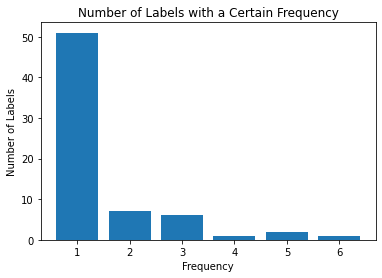

In [43]:
import matplotlib.pyplot as plt

plt.bar(frequency_frequency.keys(), frequency_frequency.values(), align="center")
plt.ylabel("Number of Labels")
plt.xlabel("Frequency")
plt.title("Number of Labels with a Certain Frequency")

plt.show()

As can be seen from the above chart, about 51 of the labels only appear once. This is the majority of the 68 total relevant labels extracted, indicating that out list of relevant labels is actually quite useless in extracting common GitHub issue labels that are relevant to security and vulnerability. This is likely because the GitHub issues we collected do not share many common labels.

The same can be observed from the plotting of frequencies from the smaller set of relevant labels where the threshold was equivalent to `security.similarity(vulnerability)`. Here, 9 out of 15 labels only appear once.

{'critical security issue', 'critical bug', 'Area: Debug Infrastructure', 'security', 'area/security', 'security findings', 'security v3', 'triage: user protections', 'security vulnerability', 'Authentication', 'infrastructure', 'embedded systems', 'Needs Hardware', 'Infrastructure', 'security fix'}
15
critical security issue	1
critical bug	2
Area: Debug Infrastructure	1
security	3
area/security	1
security findings	1
security v3	1
triage: user protections	1
security vulnerability	2
Authentication	1
infrastructure	4
embedded systems	1
Needs Hardware	1
Infrastructure	2
security fix	2


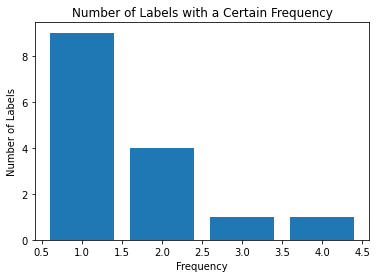

In [47]:
import matplotlib.pyplot as plt

relevant_labels_sm = read_lines("relevant_labels.txt", input_path="output")
print(relevant_labels_sm)
print(len(relevant_labels_sm))

frequency_sm = determine_frequency(relevant_labels=relevant_labels_sm, full_file="demofile3.txt", input_path="input")

for label, freq in frequency_sm.items():
  print(label + "\t" + str(freq))

frequency_labels_sm = {}

for label, freq in frequency_sm.items():
  if freq not in frequency_labels_sm:
    frequency_labels_sm[freq] = []
  frequency_labels_sm[freq] += [label]

frequency_frequency_sm = {}
for freq, label_lst in frequency_labels_sm.items():
  frequency_frequency_sm[freq] = len(label_lst)

plt.bar(frequency_frequency_sm.keys(), frequency_frequency_sm.values(), align="center")
plt.ylabel("Number of Labels")
plt.xlabel("Frequency")
plt.title("Number of Labels with a Certain Frequency")

plt.show()

## Commonality of All Labels

In [48]:
print(len(labels))

2733


In [53]:
label_freq_full = determine_frequency(relevant_labels=labels, full_file="demofile3.txt", input_path="input")

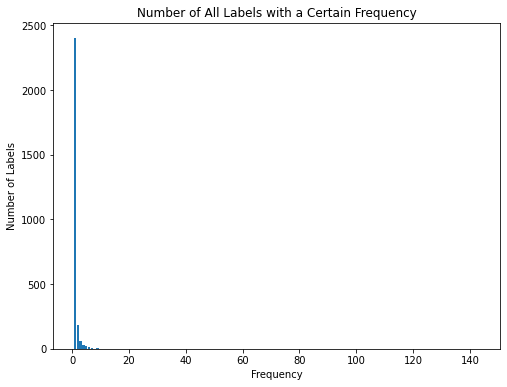

In [60]:
import matplotlib.pyplot as plt

frequency_labels_full = {}

for label, freq in label_freq_full.items():
  if freq not in frequency_labels_full:
    frequency_labels_full[freq] = []
  frequency_labels_full[freq] += [label]

frequency_frequency_full = {}
for freq, label_lst in frequency_labels_full.items():
  frequency_frequency_full[freq] = len(label_lst)

plt.rcParams['figure.figsize'] = (8,6)
plt.bar(frequency_frequency_full.keys(), frequency_frequency_full.values(), align="center")
plt.ylabel("Number of Labels")
plt.xlabel("Frequency")
plt.title("Number of All Labels with a Certain Frequency")

plt.show()

This plot is heavily skewed, demonstrating our previous observations that many issues have custom labels, which reduces out power to extract relevant labels with meaningful applicability across all projects. Below the same plot is now displayed with a logarithmic y-axis.

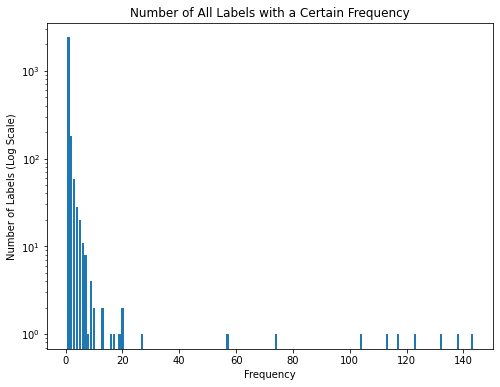

In [61]:
plt.rcParams['figure.figsize'] = (8,6)
plt.bar(frequency_frequency_full.keys(), frequency_frequency_full.values(), align="center")
plt.yscale('log')
plt.ylabel("Number of Labels (Log Scale)")
plt.xlabel("Frequency")
plt.title("Number of All Labels with a Certain Frequency")

plt.show()

In [65]:
high_freq_labels = [label for label, freq in label_freq_full.items() if freq >= 20]
print(len(high_freq_labels))
for label in high_freq_labels:
  print(label)

12
good first issue
help wanted
question
documentation
enhancement
Bug
dependencies
bug
wontfix
invalid
duplicate
Documentation


In [67]:
mid_freq_labels = [label for label, freq in label_freq_full.items() if freq >= 10 and freq < 20]
print(len(mid_freq_labels))
for label in mid_freq_labels:
  print(label)

7
feature
feature request
build
discussion
in progress
stale
CI


In [69]:
low_freq_labels = [label for label, freq in label_freq_full.items() if freq >= 2 and freq < 10]
print(len(low_freq_labels))
for label in low_freq_labels:
  print(label)

313
Build
jit
Minor Version
AT: STALE
example
C: Documentation
bug fix
CLI
esp32
tests
low-priority
type: bug
component: tools
code cleanup
Backend
kokoro:run
cli
jira/BED
community
in review
config
Performance
pr-merged
clean-up
Help wanted
CycloneDDS
Reviewed
regression
hitlist
Hotfix
continuous-integration
lang-python
blocker
Merged
do-not-merge/work-in-progress
blocked
Build system
gui
WIP
jira/GV
Enhancement
hacktoberfest-accepted
code quality
wishlist
compatibility
Feature Request
jira/CORE
Compilation
Priority-High
comp: border router
big
do not merge
project-idea
Cleanup
spam
Major Version
Incomplete
jira/NWX
✨ Merged
arm64
UX
Priority-Critical
Backport
Blocker
OpSys-Linux
internal
🚧 WIP
awaiting review
OpSys-Windows
do-not-merge/hold
Patch Version
PR: unreviewed
merge-conflict
jira/ENG
Cython
release
RPC
pinned
cleanup
needs more info
needs rebase
maintenance
In Progress
area/build
draft
installation
in-progress
Type: Bug
jira/INF
hardware
component: tests
status:invalid
task


In [70]:
single_freq_labels = [label for label, freq in label_freq_full.items() if freq == 1]
print(len(single_freq_labels))

2401


In [78]:
print("Total number of labels:\t\t\t\t\t", len(labels))
print("-------------------------------------------------------------")
print("Number of labels that appear once:\t\t\t", len(single_freq_labels))
print("Number of labels that appear in interval [2, 10):\t ", len(low_freq_labels))
print("Number of labels that appear in interval [10, 20):\t   ", len(mid_freq_labels))
print("Number of labels that appear 20 or more times:\t\t  ", len(high_freq_labels))

Total number of labels:					 2733
-------------------------------------------------------------
Number of labels that appear once:			 2401
Number of labels that appear in interval [2, 10):	  313
Number of labels that appear in interval [10, 20):	    7
Number of labels that appear 20 or more times:		   12
